In [14]:
# id NC_045512.2
# https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=genbank&log$=seqview


In [15]:
#### Outline
# + reading
# + Sequence analysis
# + freq N, AA, GV, AT content
# + protein synthesis

In [16]:
from Bio import SeqIO#

In [17]:
# Reading our fasta file
covid_record = SeqIO.read('covid_NC_045512.2.fasta', 'fasta')

In [18]:
covid_record

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [19]:
# Sequence only
covid_dna = covid_record.seq

In [20]:
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [21]:
# Len of DNA
len(covid_dna)

29903

In [22]:
# Transcription 
# DNA to mRNA
covid_mrna = covid_dna.transcribe()

In [23]:
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

In [24]:
# Translation
# mRNA to AA
covid_protein = covid_mrna.translate()

/Users/ninalenarsic/miniconda3/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [25]:
covid_protein

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [26]:
### Sequence analysis
# Freq of N and amino acids

In [27]:
# check for nucleotides
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [28]:
from collections import Counter

In [29]:
# Freq
covid_ncounts = Counter(covid_dna)

In [30]:
covid_ncounts

Counter({'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492})

In [31]:
# Plot 
import matplotlib.pyplot as plt

In [32]:
covid_ncounts = Counter(covid_dna)

<BarContainer object of 4 artists>

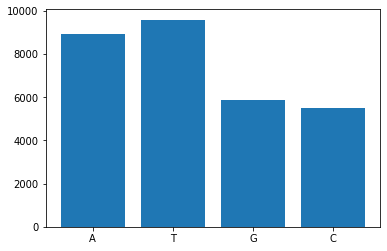

In [33]:
plt.bar(covid_ncounts.keys(), covid_ncounts.values())

In [34]:
# Molecular weight
from Bio.SeqUtils import molecular_weight

In [35]:
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [36]:
molecular_weight(covid_dna)

9241219.214400413

In [37]:
#### stripping out N (stop codons)
# covid_dna.strip('N')
## if not work: 'N' in covid_dna.strip('N') --> True

#str(covid_dna).replace('N','')
#molecular_weight(str(covid_dna).replace('N',''))

In [38]:
#### DNA composition
# GC content
# AC content

In [39]:
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [40]:
# GC content
from Bio.SeqUtils import GC,GC123,GC_skew

In [41]:
GC(covid_dna)

37.97277865097148

In [42]:
# AT content
def at_content(seq):
    result = float(seq.count('A') + seq.count('T'))/len(seq) * 100
    return result

In [43]:
at_content(covid_dna)

62.02722134902853

In [44]:
# GC skew
# Lagging or leading str
GC_skew(covid_dna)

[-0.2631578947368421,
 -0.022222222222222223,
 0.07692307692307693,
 0.05660377358490566,
 0.09090909090909091,
 0.19230769230769232,
 0.08695652173913043,
 0.08695652173913043,
 -0.04,
 0.1111111111111111,
 0.0625,
 0.07692307692307693,
 0.09090909090909091,
 0.02702702702702703,
 0.06382978723404255,
 0.2608695652173913,
 -0.0625,
 0.15151515151515152,
 0.2,
 -0.1794871794871795,
 0.12195121951219512,
 0.2,
 0.2631578947368421,
 0.17647058823529413,
 0.05,
 0.024390243902439025,
 -0.02564102564102564,
 0.12195121951219512,
 0.3333333333333333,
 0.08108108108108109,
 0.2631578947368421,
 0.15,
 0.07692307692307693,
 0.2,
 0.3170731707317073,
 0.1282051282051282,
 -0.05555555555555555,
 0.0,
 0.25,
 0.15151515151515152,
 -0.3142857142857143,
 0.3333333333333333,
 0.18181818181818182,
 0.030303030303030304,
 0.02857142857142857,
 0.0,
 0.024390243902439025,
 -0.2777777777777778,
 -0.08571428571428572,
 0.05555555555555555,
 0.0,
 0.05263157894736842,
 -0.11764705882352941,
 -0.024390243

In [45]:
# melting point
from Bio.SeqUtils import MeltingTemp as mt

In [46]:
mt.Tm_GC(covid_dna)
#mt.Tm_GC(covid_dna,strict=False) if an error

75.20366663587967

In [47]:
# Check for number of amino acids
covid_protein

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [48]:
# Freq
covid_pr_freq = Counter(covid_protein)

In [49]:
covid_pr_freq

Counter({'I': 436,
         'K': 413,
         'G': 394,
         'L': 886,
         'Y': 505,
         'P': 292,
         'R': 558,
         '*': 774,
         'Q': 325,
         'T': 679,
         'N': 472,
         'S': 810,
         'C': 635,
         'V': 548,
         'F': 593,
         'A': 375,
         'H': 332,
         'D': 290,
         'E': 270,
         'W': 263,
         'M': 117})

<BarContainer object of 21 artists>

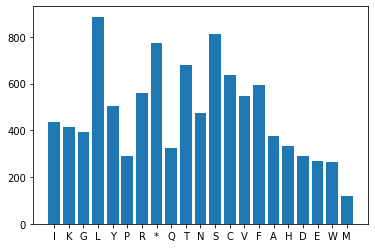

In [50]:
plt.bar(covid_pr_freq.keys(),covid_pr_freq.values())

In [51]:
# Most common AA
Counter(covid_protein).most_common(5)

[('L', 886), ('S', 810), ('*', 774), ('T', 679), ('C', 635)]

In [52]:
# Longest seq of AA before a stop codon
covid_protein

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [53]:
covid_clean = covid_protein.split('*')

In [54]:
covid_clean

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR'),
 Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'),
 Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'),
 Seq('RWHLWLSRS'),
 Seq('KRRFAST'),
 Seq('TALCVHQTFGCSNCTSWSCYG'),
 Seq('AGSRTRRHSVRS'),
 Seq('W'),
 Seq('DTWCPCPSCGRNTSGLPQGSSS'),
 Seq('ER'),
 Seq(''),
 Seq('RSWWP'),
 Seq('LRRRSKVI'),
 Seq('LRRRAWH'),
 Seq('SL'),
 Seq('RFSRKLEH'),
 Seq('T'),
 Seq('QWCYP'),
 Seq('THA'),
 Seq('A'),
 Seq('RRGIHSLCR'),
 Seq('QLLWP'),
 Seq('WLPS'),
 Seq('VH'),
 Seq('RPSSTCW'),
 Seq('SFMHFVRTTGLY'),
 Seq('H'),
 Seq('EGCILLP'),
 Seq('T'),
 Seq('A'),
 Seq('NCLVHGTF'),
 Seq('KEL'),
 Seq('IADTF'),
 Seq('N'),
 Seq('IGKEI'),
 Seq('HLQWGMSKFCISLKFHNQDYSTKG'),
 Seq('KEKA'),
 Seq('WLYG'),
 Seq('NSICLSSCVTK'),
 Seq('MQPNVPFNSHEV'),
 Seq('SLW'),
 Seq('NFMADGRFC'),
 Seq('SHLRILWH'),
 Seq('EFD'),
 Seq('RRCHYLWLLTPKCCC'),
 Seq('NLLSSMSQFRSRT'),
 Seq('A'),
 Seq('SCRIP'),
 Seq(''),
 Seq('IWLENHSS'),
 Seq('GWSHYCLWRLCVLLCWLP'),

In [55]:
covid_clean = [str(i) for i in covid_clean]

In [56]:
covid_clean

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG',
 'AGSRTRRHSVRS',
 'W',
 'DTWCPCPSCGRNTSGLPQGSSS',
 'ER',
 '',
 'RSWWP',
 'LRRRSKVI',
 'LRRRAWH',
 'SL',
 'RFSRKLEH',
 'T',
 'QWCYP',
 'THA',
 'A',
 'RRGIHSLCR',
 'QLLWP',
 'WLPS',
 'VH',
 'RPSSTCW',
 'SFMHFVRTTGLY',
 'H',
 'EGCILLP',
 'T',
 'A',
 'NCLVHGTF',
 'KEL',
 'IADTF',
 'N',
 'IGKEI',
 'HLQWGMSKFCISLKFHNQDYSTKG',
 'KEKA',
 'WLYG',
 'NSICLSSCVTK',
 'MQPNVPFNSHEV',
 'SLW',
 'NFMADGRFC',
 'SHLRILWH',
 'EFD',
 'RRCHYLWLLTPKCCC',
 'NLLSSMSQFRSRT',
 'A',
 'SCRIP',
 '',
 'IWLENHSS',
 'GWSHYCLWRLCVLLCWLP',
 'QVCLLGSTC',
 'R',
 'HRL',
 'PYRCCWRRFRRS',
 '',
 'QPS',
 'NTPKRESQHQYCW',
 'L',
 'T',
 '',
 'RDRHYFGIFFCFHKCFCGNCERFGL',
 'SIQTNC',
 'ILW',
 'F',
 'SYKRKS',
 'KRCLEYW',
 'TEINTESSLCICIRGCSCCTINFLPHS',
 'NCSKFCACFTEGRYNNTRWNFTVFTETH',
 'CYDVHI',
 'FGY',
 'QSSCNGLHYRWCCSVDF

In [57]:
import pandas as pd

In [58]:
covid_clean = [str(i) for i in covid_clean]

In [65]:
# Data frame
df = pd.DataFrame({'amino_acids':covid_clean})

In [66]:
df['count'] = df['amino_acids'].str.len()

In [62]:
df.head()

,amino_acids,count
0,IKGLYLPR,8
1,QTNQLSISCRSVL,13
2,TNFKICVAVTRLHA,14
3,CTHAV,5
4,LITNYCR,7


In [68]:
df.nlargest(10,'count')

,amino_acids,count
548,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
694,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
719,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
695,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
718,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
6,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
464,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
539,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
758,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43
771,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
